# Importing packages

In [23]:
# import all the libraries required
#Import the necessary methods from tweepy library
import os
import json
from collections import Counter
import matplotlib.pyplot as plt
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from wordcloud import WordCloud, STOPWORDS

os.chdir("/home/manu/Downloads/Priyanka/DATS6103 - Individual Project 2 - Priyanka Balineni")

# Setting API keys

In [24]:
# Setting API keys
ACCESS_TOKEN = "4396030106-ENkHDjP6maTJJBHMTvbZkBYJX4AOJVJ58YwAIBh"
ACCESS_TOKEN_SECRET = "Pa5cdGos9jEoI3QZxmoFOLzttp4cjV0D9s76lvbdCjpg5"
API_KEY = "OfajqS1MWx6FtYzJByR5UtdNB"
API_SECRET = "8g7PAzYKR0NIcJLJ77OggZmXEQRo3uO9nzHhhsNR5PAuOhsIIu"

auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

# Loading the json data files

In [25]:
tweets_py = []
tweets_ja = []
tweets_r = []
json_file_python = 'Data/python_2017-12-04_to_2017-12-12.json'
json_file_java = 'Data/java_2017-12-04_to_2017-12-12.json'
json_file_R = 'Data/#R_2017-12-04_to_2017-12-12.json'
with open(json_file_python, 'r') as f:
    lines = f.readlines()
    for line in lines:
        tweets_py.append(json.loads(line)['text'])
with open(json_file_java, 'r') as f:
    lines = f.readlines()
    for line in lines:
        tweets_ja.append(json.loads(line)['text'])
with open(json_file_R, 'r') as f:
    lines = f.readlines()
    for line in lines:
        tweets_r.append(json.loads(line)['text'])

# Comparison of userbase for Python, Java & R

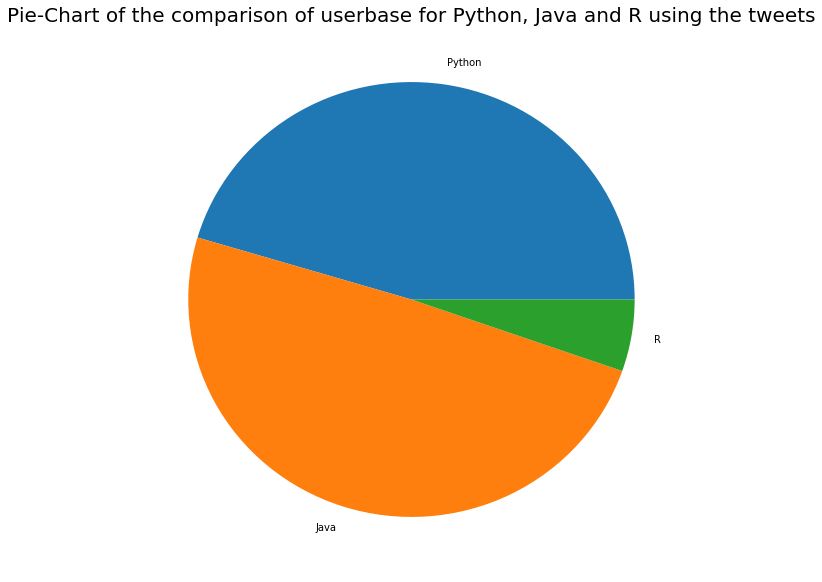

In [26]:
x = [len(tweets_py), len(tweets_ja), len(tweets_r)]
plt.figure(figsize = (10,10))
plt.pie(x, labels = ['Python', 'Java', 'R'])
plt.title("Pie-Chart of the comparison of userbase for Python, Java and R using the tweets", fontsize = 20)
plt.show()

# Geographical analysis of tweets by country

In [27]:
# Filtering the tweets and extracting the words
spec_char = ['~','!','@','#','$','%','^','&','*','(',')','_','+','|','}','{',':','"','?','>','<','`','-','=',';','/','.',',']
wordlist=[]
for tweet in tweets_py:
    for word in tweet.split(' '):
        for char in word:
            if char in spec_char:
                word = ''.join(char for char in word if char not in spec_char)
                break
        if 'http' not in word and word != 'RT' and len(word)>3:
            wordlist.append(word)


# Finding the most common words
most_common_words = Counter(wordlist).most_common(50)
wordlist = ''
for pair in most_common_words:
    wordlist += str(pair[0])
    wordlist += ' '

In [28]:
import pandas as pd
tweets_data = []
tweets_data_path = 'Data/python_2017-12-04_to_2017-12-12.json'
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [29]:
tweets_country = []
for tweet in tweets_data:
    tweets_country.append(tweet['place']['country'] if tweet['place'] != None else None)
countries = list(set(tweets_country))

country_counts = []
for country in countries:
    country_counts.append(tweets_country.count(country))

tweets_by_country = pd.DataFrame({'Country':countries, 'Count':country_counts})
tweets_by_country = tweets_by_country.sort_values('Count', ascending=False)
tweets_by_country = tweets_by_country.drop(tweets_by_country.index[0])

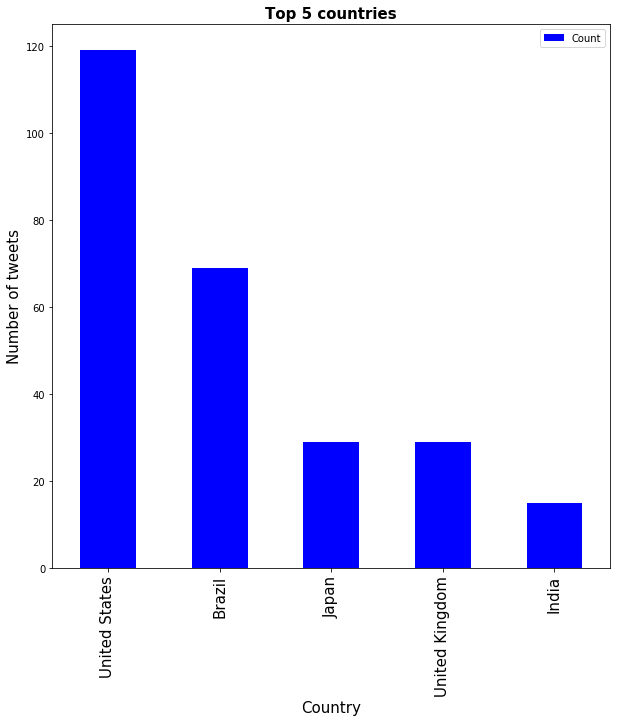

In [30]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
labels = tweets_by_country['Country'].values.tolist()[:5]
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')
ax.set_xticklabels(labels, minor=False, rotation = 90)
plt.show()

# Time series analysis of tweets on hourly basis

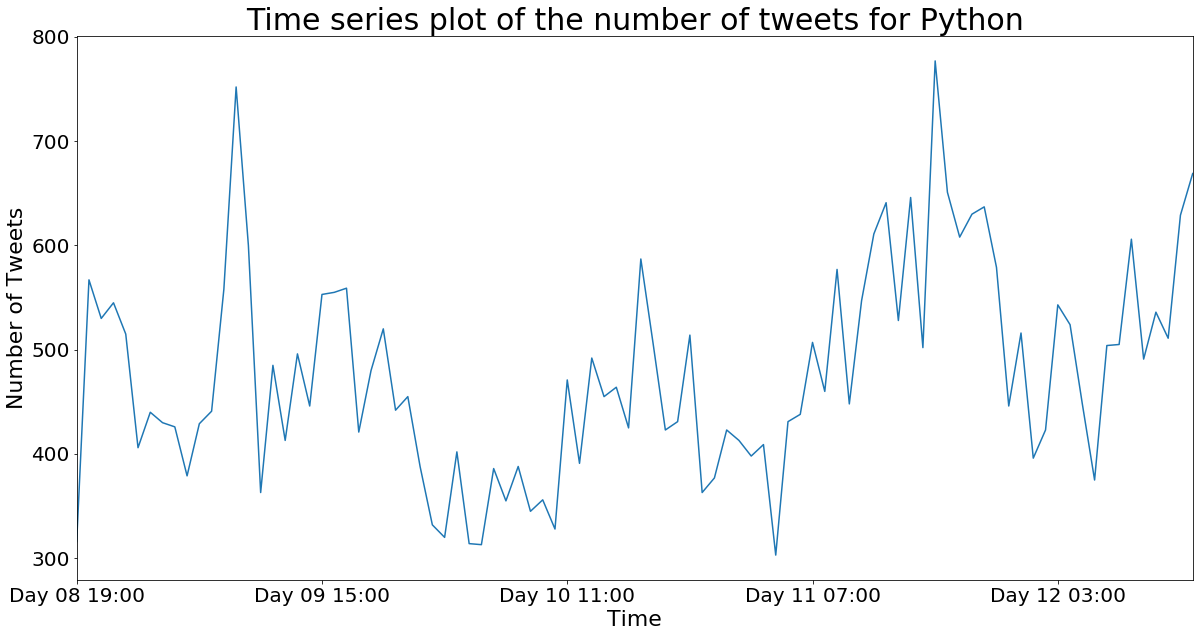

In [31]:
tweets_by_day = []
tweets_by_hour = []
tweets_by_time = []
for tweet in tweets_data:
    tweets_by_time.append(tweet['created_at'][8:13])
    tweets_by_day.append(tweet['created_at'][8:10])
    tweets_by_hour.append(tweet['created_at'][11:13])
    
days = list(set(tweets_by_day))
hours = list(set(tweets_by_hour))
times = list(set(tweets_by_time))

day_counts = []
hour_counts = []
time_counts = []
day_hour_counts = []
for time in times:
    time_counts.append(tweets_by_time.count(time))
    day_counts.append(time[0:2])
    hour_counts.append(time[3:5])
    day_hour_counts.append(str("Day ")+time[0:5]+str(":00"))

tweets_by_times = pd.DataFrame({'Count':time_counts, 'Day':day_counts, 'Hour':hour_counts, 'Day-Hour':day_hour_counts})
tweets_by_times['Day'] = tweets_by_times['Day'].astype(int)
tweets_by_times['Hour'] = tweets_by_times['Hour'].astype(int)
tweets_by_times= tweets_by_times.sort_values(by = ['Day', 'Hour'])

plt.figure(figsize=(20,10))
ts = pd.Series(tweets_by_times['Count'].values, index=tweets_by_times['Day-Hour'])
ax = ts.plot(style = '-', label = 'Series')
ax.set_xlabel('Time', fontsize = 22)
ax.set_ylabel("Number of Tweets", fontsize = 22)
ax.set_title("Time series plot of the number of tweets for Python", fontsize =30)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# Generating wordcloud of tweets

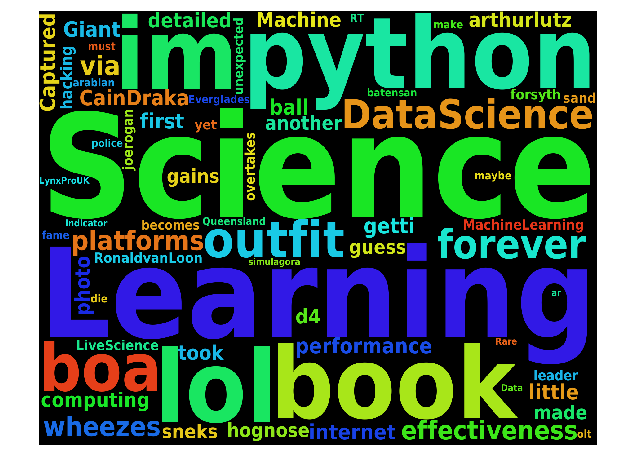

In [32]:
query = 'Python'
max_tweets = 100
search_results = api.search(q=query, count = max_tweets)

tweets = []
count=0
for tweet in search_results:
    tweets.append(tweet._json['text'])
    count+=1
    
# Filtering the tweets and extracting the words
spec_char = ['~','!','@','#','$','%','^','&','*','(',')','_','+','|','}','{',':','"','?','>','<','`','-','=',';','/','.',',']
wordlist=[]
for tweet in tweets:
    for word in tweet.split(' '):
        for char in word:
            if char in spec_char:
                word = ''.join(char for char in word if char not in spec_char)
                break
        if 'http' not in word and word != 'RT':
            wordlist.append(word)

# Finding the most common words
most_common_words = Counter(wordlist).most_common(100)
wordlist = ''
for pair in most_common_words:
    wordlist += str(pair[0])
    wordlist += ' '

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in wordlist.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(
                      font_path='/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(no_urls_no_tags)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()

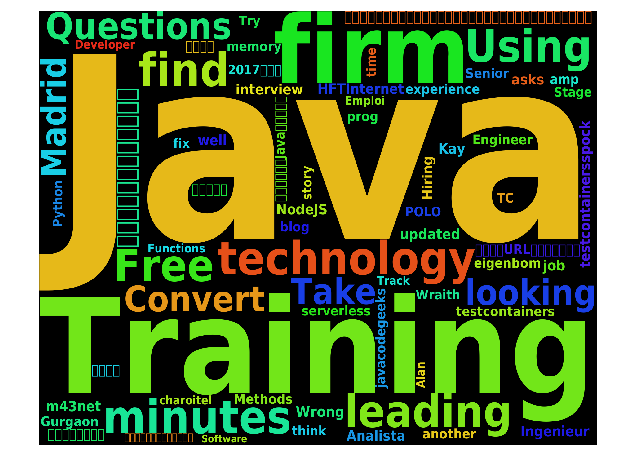

In [33]:
query = 'Java'
max_tweets = 100
search_results = api.search(q=query, count = max_tweets)

tweets = []
count=0
for tweet in search_results:
    tweets.append(tweet._json['text'])
    count+=1
    
# Filtering the tweets and extracting the words
spec_char = ['~','!','@','#','$','%','^','&','*','(',')','_','+','|','}','{',':','"','?','>','<','`','-','=',';','/','.',',']
wordlist=[]
for tweet in tweets:
    for word in tweet.split(' '):
        for char in word:
            if char in spec_char:
                word = ''.join(char for char in word if char not in spec_char)
                break
        if 'http' not in word and word != 'RT':
            wordlist.append(word)

# Finding the most common words
most_common_words = Counter(wordlist).most_common(100)
wordlist = ''
for pair in most_common_words:
    wordlist += str(pair[0])
    wordlist += ' '

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in wordlist.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(
                      font_path='/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(no_urls_no_tags)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()

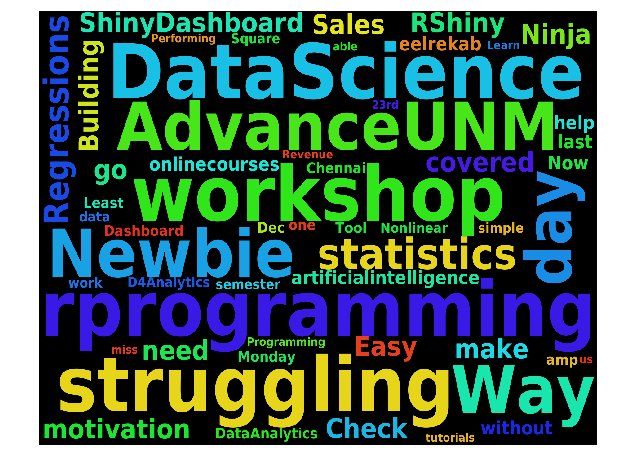

In [34]:
query = 'Rprogramming'
max_tweets = 100
search_results = api.search(q=query, count = max_tweets)

tweets = []
count=0
for tweet in search_results:
    tweets.append(tweet._json['text'])
    count+=1
    
# Filtering the tweets and extracting the words
spec_char = ['~','!','@','#','$','%','^','&','*','(',')','_','+','|','}','{',':','"','?','>','<','`','-','=',';','/','.',',']
wordlist=[]
for tweet in tweets:
    for word in tweet.split(' '):
        for char in word:
            if char in spec_char:
                word = ''.join(char for char in word if char not in spec_char)
                break
        if 'http' not in word and word != 'RT':
            wordlist.append(word)

# Finding the most common words
most_common_words = Counter(wordlist).most_common(100)
wordlist = ''
for pair in most_common_words:
    wordlist += str(pair[0])
    wordlist += ' '

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in wordlist.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(
                      font_path='/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(no_urls_no_tags)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()